In [1]:
import importers
import importlib
importlib.reload(importers)
from importers import SpikeImporter

data_folder = "../data/"
file_name = "11_10_27U2a_2000s_2300s_20000Hz_Force_BigFibre"
file_ending = ".csv"

time_channel = "Time"
signal_channel = "1 Signal"
stimulus_channel = "32 DigMark"
ap_marker_channels = ["801 nw-1", "12 nw-1"]
force_channel = "3 Force"

# load the animal file
importer = SpikeImporter(filepath = data_folder + file_name + file_ending, \
                         time_channel = time_channel, signal_channel = signal_channel, stimulus_channel = stimulus_channel, \
                         ap_marker_channels = ap_marker_channels, force_channel = force_channel)

print("Data loaded.")

# define the max. time so that two sequential waveform-values are belonging to the same AP
# the time is in seconds, so 0.005 equals 5ms
max_gap_time = 0.005
force_thresh = 0.5

# retrieve the events from the importer 
el_stimuli = importer.getElectricalStimuli()
mech_stimuli = importer.getMechanicalStimuli(threshold = force_thresh, max_gap_time = 0.005)
actpots = importer.getActionPotentials(max_gap_time = max_gap_time, el_stimuli = el_stimuli, mech_stimuli = mech_stimuli)

Data loaded.
List of eletrical stimuli created.
List of mechanical stimuli created.
List of APs created.


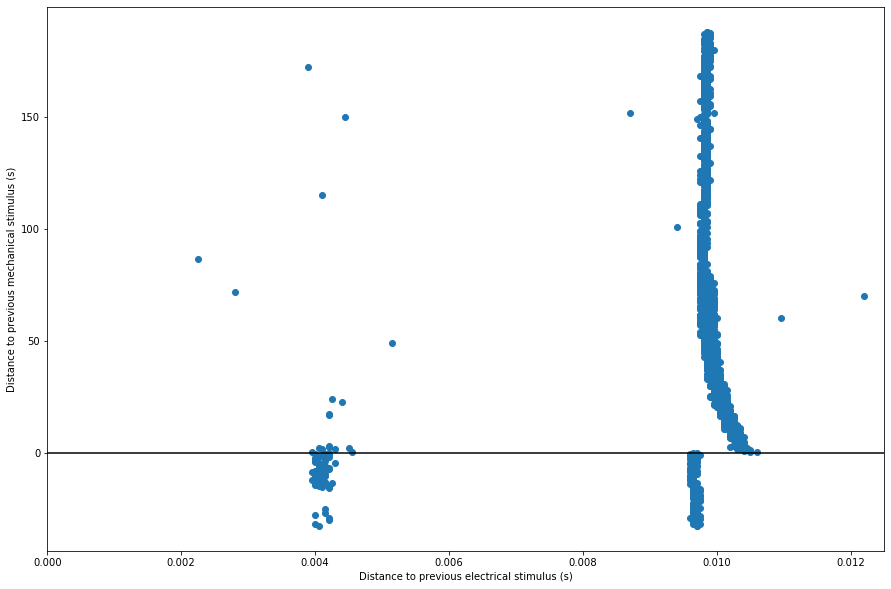

In [13]:
import matplotlib.pyplot as plt
import numpy as np

points = np.array([[ap.getDistanceToPreviousElectricalStimulus(), ap.getDistanceToPreviousMechanicalStimulus()] for ap in actpots])

# initialize figure
plt.figure(figsize = (15, 10))

# where to save the results
results_folder = "../results/"
results_ending = ".png"

# draw horizontal line at y = 0
ax = plt.gca()
ax.axhline(y = 0, color = 'k')
plt.scatter(x = points[:, 0], y = points[:, 1])

plt.xscale('linear')
plt.xlim(0, 0.0125)
plt.xlabel("Distance to previous electrical stimulus (s)")
plt.ylabel("Distance to previous mechanical stimulus (s)")

plt.savefig(results_folder + "force_vs_el_" + file_name + results_ending, dpi = 400)
plt.show()